In [1]:
import pandas as pd
df=pd.read_csv('d:/data/ozone/ozone4.csv')
df.head()

,Ozone,Solar.R,Solar.R2,Wind,Temp,Month,Day,Ozone2,Result
0,41.0,190.0,190.000000,7.4,67,5,1,41.00000,0
1,36.0,118.0,118.000000,8.0,72,5,2,36.00000,0
2,12.0,149.0,149.000000,12.6,74,5,3,12.00000,0
3,18.0,313.0,313.000000,11.5,62,5,4,18.00000,0
4,NaN,NaN,185.931507,14.3,56,5,5,42.12931,0


In [2]:
df['Result'].value_counts()

0    109
1     44
Name: Result, dtype: int64

In [3]:
cols=['Solar.R2','Wind','Temp']
X=df[cols]
y=df['Result']

In [4]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=cols)
y_samp=pd.DataFrame(data=y_sample,columns=['Result'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

Using TensorFlow backend.


In [5]:
df_samp['Result'].value_counts()

1    44
0    44
Name: Result, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)

Text(0.5, 0, 'number of clusters')

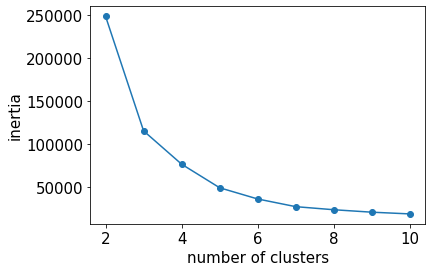

In [7]:
#최적의 클러스터 갯수를 구하는 실험
# inertia:중심좌표에서 군집의 데이터간의 거리를 합산한 값
# 작을수록 응집도가 높은 군집
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
clusters=range(2,11)
inertias=[]
for n in clusters: #클러스터 갯수 2~10
    model=KMeans(n_clusters=n,random_state=10)
    model.fit(X_train) #학습
    inertias.append(model.inertia_)
    
plt.rcParams['font.size']=15
plt.plot(clusters,inertias,'-o')
plt.ylabel('inertia')
plt.xlabel('number of clusters')

In [8]:
#엘보우 포인트 3
model=KMeans(n_clusters=3, random_state=10)
pred=model.fit_predict(X_train)
print(pred)
pred=model.fit_predict(X_test)
print(pred)

[1 1 0 0 1 1 1 2 1 0 2 2 0 1 1 0 1 2 2 1 0 2 1 2 1 2 1 1 1 1 2 2 0 1 1 1 1
 1 1 2 2 1 1 1 0 1 2 1 1 1 1 2 0 2 1 2 1 0 2 2 2 2 1 2 1 2 1 2 0 1 2 0 0 0
 1 0 2 0 1 1 2 1 2 1 2 2 0 1 1 2 0 2 2 0 0 2 2 1 1 0 2 1 1 1 1 1 2 1 2 2 2
 1 1 0 2 1 1 1 1 0 0 0]
[0 2 1 1 1 0 0 0 0 1 0 2 1 1 0 1 1 1 0 1 2 0 1 1 0 2 1 2 2 2 2]


In [9]:
#실루엣 점수 :  한 클러스터 안의 데이터들이 얼마나 비슷한지를 나타내는값
from sklearn.metrics import silhouette_score
print(X_test)
print(pred)
silhouette_score(X_test,pred)

     Solar.R2  Wind  Temp
94       77.0   7.4    82
31      286.0   8.6    78
79      187.0   5.1    87
100     207.0   8.0    90
133     236.0  14.9    81
93       24.0  13.8    81
106      64.0  11.5    79
144      14.0   9.2    71
136      24.0  10.9    71
88      213.0   7.4    88
87       82.0  12.0    86
11      256.0   9.7    69
0       190.0   7.4    67
130     220.0  10.3    78
57       47.0  10.3    73
131     230.0  10.9    75
115     212.0   9.7    79
35      220.0   8.6    85
8        19.0  20.1    61
117     215.0   8.0    86
16      307.0  12.0    66
127      95.0   7.4    87
103     192.0  11.5    86
9       194.0   8.6    69
52       59.0   1.7    76
72      264.0  14.3    73
43      148.0   8.0    82
30      279.0   7.4    76
38      273.0   6.9    87
15      334.0  11.5    64
74      291.0  14.9    91
[0 2 1 1 1 0 0 0 0 1 0 2 1 1 0 1 1 1 0 1 2 0 1 1 0 2 1 2 2 2 2]


0.653694557248522

In [10]:
#군집갯수를 2로 설정한 모형
model=KMeans(n_clusters=2, random_state=10)
pred=model.fit_predict(X_train)
print(pred)
pred=model.fit_predict(X_test)
print(pred)

[0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1
 0 0 1 1 0 0 0 0 1 1 1]
[0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1]


In [11]:
from sklearn.metrics import silhouette_score
silhouette_score(X_test,pred)

0.716164017347588

C:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


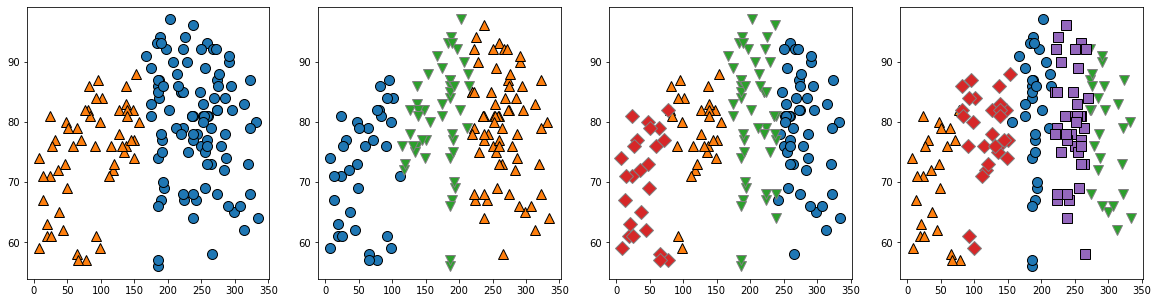

In [12]:
import mglearn
fig,axes=plt.subplots(1,4,figsize=(20,5))
idx=0
for k in [2,3,4,5]: #군집갯수 2~5개일 경우의 산점도 그래프
    kmeans=KMeans(n_clusters=k) #군집갯수
    kmeans.fit(X) #군집화
    lbls=kmeans.labels_ #모형이 분류한 라벨
    mglearn.discrete_scatter(X['Solar.R2'],X['Temp'],lbls,
                            ax=axes[idx])
    idx+=1